
---

### Unit 1 Project

**Group 9:**

- Erica Drummond
- Madison Meyers
- Jake Miller
- Shrinath Parikh
- Pranati Yadlapalli  

*NEUR 3002 / BMED 4803 - Due 2/13/2024*

---

#### Leaky Integrate-and-Fire Neuron (Q2a)
  
Description:

*The Leaky Integrate-and-Fire model provides a circuit interpretation of the biological neuron. Spikes are not modeled action potentials, but event representations indicating the reaching of membrane threshold. The model assumes an input current which encompasses all of the complex synaptic currents into a single variable. Based on a time constant $\tau=R_L C$, the input can drive the membrane potential to threshold faster or slower. The resistance $R_L$ represents the reciprocal of the leaky conductance provided by ions travelling through membrane pores and channels. The capacitance $C$ represents the accumulation of ions on either side of the cell membrane, which also describes the membrane potential.*


---

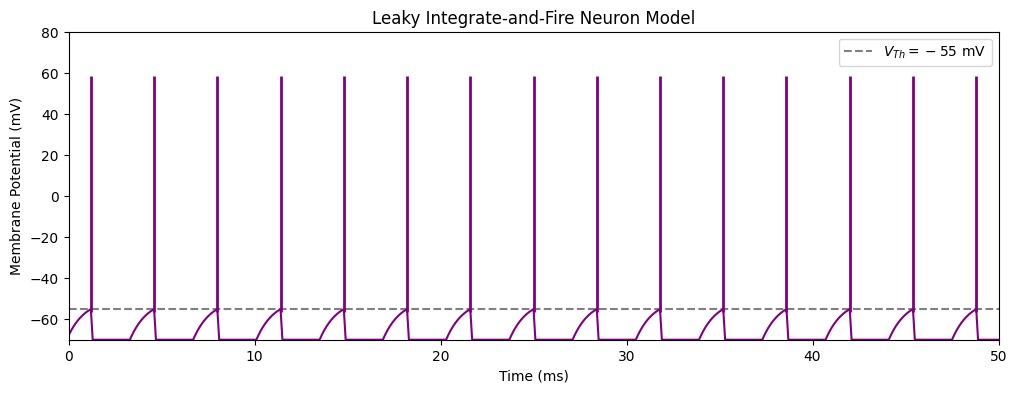

In [82]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, tau_m=10, v_th=-55, v_L=-70, g_L=10, tau_ref=2):
        self.tau_m = tau_m  # membrane time constant
        self.v_th = v_th  # threshold potential
        self.v_L = v_L  # resting/leaky membrane potential
        self.g_L = g_L # leaky membrane conductance
        self.tau_ref = tau_ref  # refractory period
        self.reset()

    def reset(self):
        self.v = self.v_L
        self.refractory_time = 0

    def update(self, dt, current):
        if self.refractory_time > 0:
            self.refractory_time -= dt
            self.v = self.v_L
        else:
            dv = (-self.g_L*(self.v - self.v_L) + current) / self.tau_m * dt
            self.v += dv
            if self.v >= self.v_th:
                self.v = self.v_L
                self.refractory_time = self.tau_ref
                return True  # Spike occurred
        return False

def simulate_lif_neuron(neuron, currents, dt=0.1, duration=100):
    
    num_steps = int(duration / dt)

    voltages = []
    spike_times = []

    for i in range(num_steps):
        current = currents[i] if i < len(currents) else 0
        spike_occurred = neuron.update(dt, current)
        voltages.append(neuron.v)

        if spike_occurred:
            spike_times.append(i * dt)

    time = np.arange(0, duration, dt)
    return time, voltages, spike_times

# Produce Simulation
ampltiude = 200
currents = np.ones(1000)*ampltiude                                                                  # 1000 * dt = 100 ms               

'''
# For Madison and Pranati, this code might help as a starting point for constructing different inputs
currents = np.zeros(1000)
for i in range(len(currents)):
    if i % 40 == 0:
        pulse_width = 10 # 2 ms
        currents[i:i+pulse_width] = np.ones(pulse_width)*ampltiude
'''

neuron = LIFNeuron()
time, voltages, spike_times = simulate_lif_neuron(neuron, currents)

# Plotting the results
plt.figure(figsize=(12, 4))
plt.axhline(neuron.v_th,color='gray',linestyle='--',label=r'$V_{Th}=-55\text{ mV}$')
plt.plot(time, voltages, color='purple')
plt.eventplot(np.array(spike_times)-0.1, color='purple', linewidths=2, linelengths=115)                # Draw the spikes  
plt.title('Leaky Integrate-and-Fire Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.xlim([0,50])
plt.ylim([neuron.v_L, 80])
plt.legend()
plt.show()

#### Updated Leaky Integrate-and-Fire Neuron (Q2b)

Description:

*This updated Leaky Integrate-and-Fire model takes into account Voltage-Gated Sodium Channels $(\text{Na}_V)$ to better model relevant potentials in spiking. The $\text{Na}_V$ channels located in the Axon Initial Segment are responsible for generating action potentials in the neuron to propagate down the axon. Our prior LIF model could merely detect if a spike should occur, but did not generate them itself. By considering the gating behavior of gated sodium channels, we can create the spike. We achieve this by assuming the channels "turn on" at threshold and set a sodium current to activate and drive the potential to sodium's equilibrium potential. This creates more realistic and complex spikes than the standard model.*

---

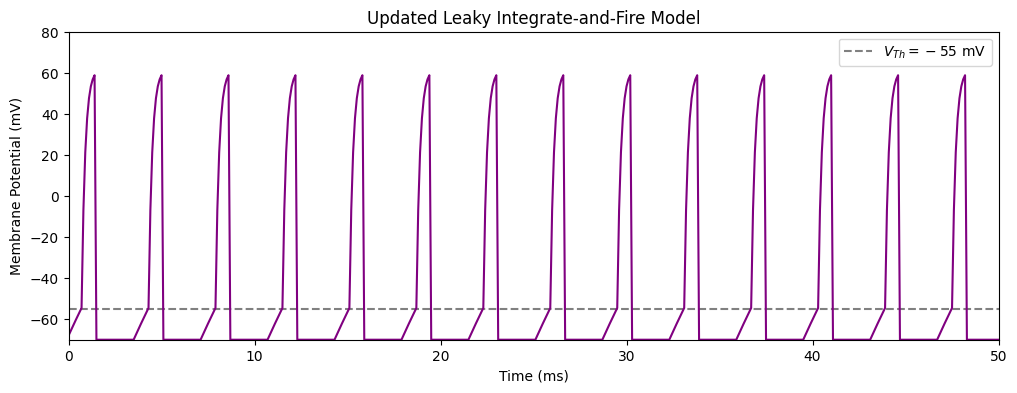

In [64]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, v_th=-55, C=10, v_L=-70, g_L=1, 
                       v_Na=60, g_Na=40, tau_ref=2):
        self.C = C # membrane capacitance
        self.v_th = v_th  # threshold potential
        self.v_L = v_L  # resting/leaky membrane potential
        self.g_L = g_L # leaky membrane conductance
        self.v_Na = v_Na  # sodium equilibrium potential
        self.g_Na = g_Na # sodium membrane conductance
        self.tau_ref = tau_ref  # refractory period
        self.reset()

    def reset(self):
        self.v = self.v_L
        self.refractory_time = 0

    def update(self, dt, current):
        if self.refractory_time > 0:
            self.refractory_time -= dt
            self.v = self.v_L
        else:
            if self.v < self.v_th:
                dv = (-self.g_L*(self.v-self.v_L) + current) / self.C * dt
            else: # Add sodium current once reaching threshold
                dv = (-self.g_L*(self.v-self.v_L)-self.g_Na*(self.v-self.v_Na) + current) / self.C * dt
            self.v += dv
            if self.v >= self.v_Na or dv < 0.05: # Reset action potential if at sodium potential or V infinity
                self.v = self.v_L
                self.refractory_time = self.tau_ref

def simulate_lif_neuron(neuron, currents, dt=0.1, duration=100):
    
    num_steps = int(duration / dt)

    voltages = []

    for i in range(num_steps):
        current = currents[i] if i < len(currents) else 0
        neuron.update(dt, current)
        voltages.append(neuron.v)

    time = np.arange(0, duration, dt)
    return time, voltages

# Produce Simulation
ampltiude = 200
currents = np.ones(1000)*ampltiude                                                                  # 1000 * dt = 100 ms               

neuron = LIFNeuron()
time, voltages = simulate_lif_neuron(neuron, currents)

# Plotting the results
plt.figure(figsize=(12, 4))
plt.axhline(neuron.v_th,color='gray',linestyle='--',label=r'$V_{Th}=-55\text{ mV}$')
plt.plot(time, voltages, color='purple')
plt.title('Updated Leaky Integrate-and-Fire Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.xlim([0,50])
plt.ylim([neuron.v_L, 80])
plt.legend()
plt.show()

#### Spiking Neural Network (Q2c)

Description:

*A Spiking Neural Network (SNN) takes advantage of the complexity of neural networks to produce sophisticated spiking models.*

---

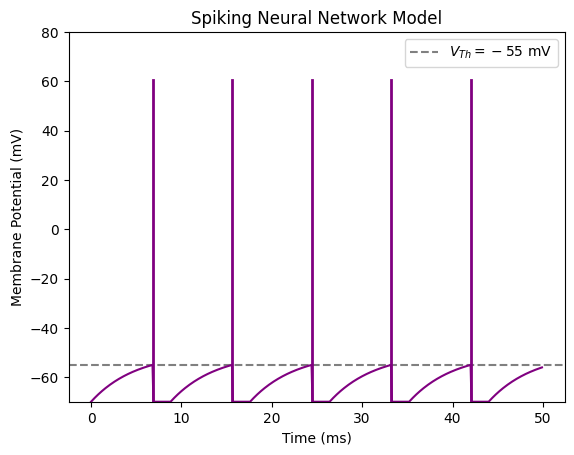

In [81]:
from brian2 import *

# Define the spiking neural network model
start_scope()

# Neuron parameters
tau = 5 * ms  # Membrane time constant
v_rest = -70 * mV  # Resting membrane potential
v_threshold = -55 * mV  # Spike threshold
g_L = 10 * uS  # leaky conductance
refractory_period = 2 * ms  # Refractory period after a spike

# Synaptic input parameters
input_current = 200 * nA  # Amplitude of the input current

# Neuron model with input current
eqs = '''
dv/dt = ((v_rest - v) + input_current/g_L) / tau : volt (unless refractory)
'''

# Create the neuron
neuron = NeuronGroup(1, eqs, threshold='v>v_threshold', reset='v=v_rest', refractory=refractory_period, method='euler')

# Monitor the membrane potential and spikes
membrane_monitor = StateMonitor(neuron, 'v', record=True)
spike_monitor = SpikeMonitor(neuron)

# Intial condition
neuron.v = v_rest

# Run the simulation
duration = 50 * ms
run(duration)

# Plot the membrane potential
axhline(v_threshold/mV,ls='--',c='gray',label=r'$V_{Th}=-55\text{ mV}$')
plot(membrane_monitor.t/ms, membrane_monitor.v[0]/mV, c='purple')
for t in spike_monitor.t:
    axvline(t/ms, ymax=0.87, ls='-', c='purple', lw=2)
xlabel('Time (ms)')
ylabel('Membrane Potential (mV)')
ylim([v_rest/mV,80])
title('Spiking Neural Network Model')
legend()
show()

#### Evaluation of Spiking Models (Q3) 

Erica and Shrinath

---

Comparison:



words go here :D (answer to question 3) (10 pts for comparison)


Information Theory:

words also go here :O (also question 3) (5 pts for information theory)

---

#### Input Comparison (Q4)

Pranati

---

words go here :D (answer to question 4) (5 pts)

---

In [ ]:
# code to generate input figures goes here

#### Inhibitory Inputs (Q5)

Madison

---

words go here :D (answer to question 5) (5 pts)

---

In [ ]:
# code to generate inhibitory input figures goes here

#### Topic Discussion (Q6)

Erica and Shrinath

*topic name goes here*

---

words go here :D (answer goes here, this one is worth 15 pts!) I would cite sources, at least as links, and you can do in text links in markdown with this format: [TEXT FOR LINK](https://www.markdownguide.org/cheat-sheet/)

---

#### Bonus (Q7)

***MATPLOTLIB CATS!!!***

---

In [ ]:
# ChatGPT Cat 1 (Pixel Cat)

import matplotlib.pyplot as plt
import numpy as np

def draw_cat():
    # Define the pixel art for the cat
    cat_pixels = [
        [0, 0, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1],
    ]

    # Create a NumPy array from the pixel data
    cat_array = np.array(cat_pixels)

    # Display the pixel art using Matplotlib
    plt.imshow(cat_array, cmap='gray', interpolation='nearest')
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Call the function to draw the cat pixel art
draw_cat()

In [ ]:
# ChatGPT Cat 2 (Horrifying)

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def generate_cat_image():
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Draw the cat's head
    head = patches.Circle((0.5, 0.5), radius=0.4, facecolor='gray', edgecolor='black')
    ax.add_patch(head)

    # Draw the eyes
    left_eye = patches.Circle((0.35, 0.65), radius=0.05, facecolor='white', edgecolor='black')
    right_eye = patches.Circle((0.65, 0.65), radius=0.05, facecolor='white', edgecolor='black')
    ax.add_patch(left_eye)
    ax.add_patch(right_eye)

    # Draw the nose
    nose = patches.Polygon([[0.5, 0.5], [0.48, 0.42], [0.52, 0.42]], closed=True, facecolor='pink', edgecolor='black')
    ax.add_patch(nose)

    # Draw the mouth
    mouth = patches.Arc((0.5, 0.45), width=0.2, height=0.1, theta1=0, theta2=180, facecolor='none', edgecolor='black')
    ax.add_patch(mouth)

    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')

    # Set axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the cat image
    plt.show()

# Call the function to generate and display the cat image
generate_cat_image()

In [ ]:
# ChatGPT Cat 3 (Orange Cat)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def generate_detailed_orange_cat():
    fig, ax = plt.subplots()

    # Draw the cat's head
    head = patches.Circle((0.5, 0.5), radius=0.4, facecolor='#fcb103', edgecolor='black')
    ax.add_patch(head)

    # Add fur texture to the face
    for _ in range(1000):
        r = np.random.uniform(0.05, 0.38)
        theta = np.random.uniform(0,2*np.pi)
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        size = np.random.uniform(0.005, 0.02)
        ax.add_patch(patches.Circle((x+0.5, y+0.5), radius=size, color='#FFA500'))

    # Draw ears
    left_ear = patches.Polygon([[0.35, 0.85], [0.3, 0.95], [0.4, 0.95]], closed=True, facecolor='#FFA500', edgecolor='black')
    right_ear = patches.Polygon([[0.65, 0.85], [0.6, 0.95], [0.7, 0.95]], closed=True, facecolor='#FFA500', edgecolor='black')
    ax.add_patch(left_ear)
    ax.add_patch(right_ear)

    # Draw eyes
    left_eye = patches.Circle((0.35, 0.6), radius=0.05, facecolor='white', edgecolor='black')
    right_eye = patches.Circle((0.65, 0.6), radius=0.05, facecolor='white', edgecolor='black')
    ax.add_patch(left_eye)
    ax.add_patch(right_eye)

    # Draw pupils
    left_pupil = patches.Circle((0.35, 0.6), radius=0.02, facecolor='black')
    right_pupil = patches.Circle((0.65, 0.6), radius=0.02, facecolor='black')
    ax.add_patch(left_pupil)
    ax.add_patch(right_pupil)

    # Draw nose
    nose = patches.Polygon([[0.5, 0.5], [0.48, 0.42], [0.52, 0.42]], closed=True, facecolor='pink', edgecolor='black')
    ax.add_patch(nose)

    # Draw mouth
    mouth = patches.PathPatch(
        Path([(0.42, 0.4), (0.5, 0.35), (0.58, 0.4)], [Path.MOVETO, Path.CURVE3, Path.CURVE3]),
        facecolor='none', edgecolor='black'
    )
    ax.add_patch(mouth)


    # Add whiskers
    whiskers = [
        [(0.35, 0.48), (0.3, 0.48)],
        [(0.65, 0.48), (0.7, 0.48)],
    ]
    for whisker in whiskers:
        ax.plot(*zip(*whisker), color='black', linewidth=1)

    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')

    # Set axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

# Call the function to generate and display the detailed orange cat
generate_detailed_orange_cat()
